In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv ('/content/drive/MyDrive/quantum/internship_train.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304


In [ ]:
print(f"Nr of rows: {len(df)}")

print(f"Missing values?: {df.isnull().values.any()}")

print(f"Datatypes: {set([x for x in df.dtypes])}")

Nr of rows: 90000
Missing values?: False
Datatypes: {dtype('float64'), dtype('int64')}


I decided to use a random forest regressor, because it's often a good starting point for most tabular data problems like this one.

In [ ]:
from sklearn.model_selection import train_test_split

x = df.iloc [:, : -1]
y = df.iloc [:, -1 :] 

X_train, X_test, y_train, y_test = train_test_split(
                                x, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(random_state=0)

In [ ]:
score = regressor.score(X_train, y_train)
print("R-squared:", score)

R-squared: 0.9999999972404852


In [ ]:
from sklearn.metrics import mean_squared_error

ypred = regressor.predict(X_test)

mse = mean_squared_error(y_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 

MSE:  1.4452858114389958e-05
RMSE:  7.226429057194979e-06


With more time we could further finetune the model for example by using GridSearchCV or RandomSearchCV and using RMSE as a target score.

However I think that in this case there is no need for improvement as the score is quite good.

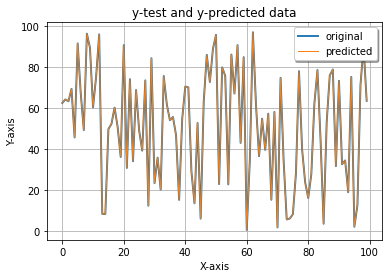

In [ ]:
# Simple graph to visualize some results
x_ax = range(0, 100)
plt.plot(x_ax, y_test[:100], linewidth=1.9, label="original")
plt.plot(x_ax, ypred[:100], linewidth=1., label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [ ]:
# Predict new/hidden data
df = pd.read_csv ('/content/drive/MyDrive/quantum/internship_hidden_test.csv')

ypred = regressor.predict(df)
df['prediction'] = ypred

df.to_csv('hidden_test_with_predictions.csv', index=False)